# **ANALISIS DATA EKSPLORATIF: PREDIKSI BIAYA MEDIS PERSONAL BERDASARKAN FAKTOR DEMOGRAFIS, GAYA HIDUP, DAN KESEHATAN**

---

Notebook ini berisi...

---

### **Praktikum Data Science**
#### **Anggota Kelompok (NIM - Nama - Kelas Praktikum):**
1. **123230085 - Nabil Aqila Putra - IF-E**
2. **123230102 - Farrel Aryaputra Wibowo - IF-E**
3. **123230111 - Made Delsa Anggara - IF-A**

---

## ***Import Libraries* yang Digunakan**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns
import os
import joblib

from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import root_mean_squared_error,mean_squared_error, r2_score,mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression

## **Mengunduh Dataset**

In [2]:
path = kagglehub.dataset_download("mosapabdelghany/medical-insurance-cost-dataset")
print("Path to dataset files:", path)

csv_path = os.path.join(path, "insurance.csv")

100%|██████████| 16.0k/16.0k [00:00<00:00, 23.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mosapabdelghany/medical-insurance-cost-dataset/versions/1


## **Memuat Dataset dan Menampilkan 5 Baris Pertama**

In [3]:
df = pd.read_csv(csv_path)
display(df.head())



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **Melihat Informasi Umum Dataset**

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Penjelasan:** Dari informasi yang ditampilkan, data set terdiri dari 7 fitur. Terdapat 4 fitur numerik, yaitu age, bmi, children, dan charges. sedangkan untuk fitur numerik ada 3 fitur, yaitu sex, smoker, dan region.

## **Memeriksa Data Kosong pada Dataset**

In [5]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


**Penjelasan:** Dari hasil pemeriksaan tidak ada data kosong pada dataset yang digunakan, Sehingga tidak diperlukan pengolahan terhadap data kosong

## **Memeriksa dan Menghapus Duplikasi Data pada Dataset**

In [6]:
# Memeriksa duplikasi data
print(f"Jumlah duplicated data : {df.duplicated().sum()}")

Jumlah duplicated data : 1


In [7]:
# Menghapus duplikasi dan mempertahankan data yang terakhir
df = df.drop_duplicates(keep='last')
print(f"Jumlah duplicated data : {df.duplicated().sum()}")

Jumlah duplicated data : 0


**Penjelasan:** Pada hasil pemeriksaan dataset memilik 1 data duplikat. Kemudian, data duplikat tersebut dihapus dari dataset.

## **Mengecek *Unique* Data**

In [8]:
#sex
print(f"cek Unique data \"sex\" : {df["sex"].unique()}")
print(f"Jumlah Unique data \"sex\" : {df["sex"].nunique()}\n")

#smoker"
print(f"cek Unique data \"smoker\" : {df["smoker"].unique()}")
print(f"Jumlah Unique data \"smoker\" : {df["smoker"].nunique()}\n")

#region
print(f"cek Unique data \"region\" : {df["region"].unique()}")
print(f"Jumlah Unique data \"region\" : {df["region"].nunique()}\n")

cek Unique data "sex" : ['female' 'male']
Jumlah Unique data "sex" : 2

cek Unique data "smoker" : ['yes' 'no']
Jumlah Unique data "smoker" : 2

cek Unique data "region" : ['southwest' 'southeast' 'northwest' 'northeast']
Jumlah Unique data "region" : 4



**Penjelasan** : dari apa yang telah ditampilkan terlihat bahwa data kategorikal tiap fitur sudah unique, artinya tidak terdapat kategori yang berbeda penulisan tapi bermakna yang sama. sehingga tidak diperlukan pemprosesan untuk mengubah label yang bermakna sama.

## **Analisis Data Eksplorasi**

### 1. *Univariate Analysis*


#### a. Distribusi Usia

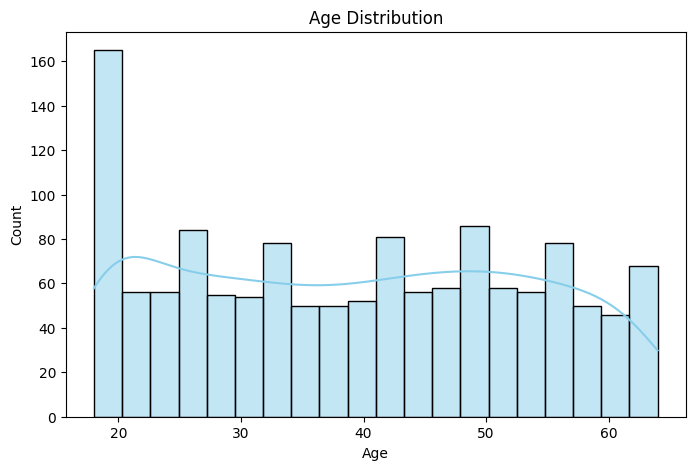

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(x=df['age'], bins=20, kde=True, color='skyblue',legend=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Penjelasan:** Terdapat lonjakan yang sangat tinggi pada usia remaja/dewasa muda (sekitar 18-19 tahun). Setelah usia 20 tahun ke atas, distribusi terlihat cukup merata (uniform) hingga usia 60-an tahun. Artinya, banyak peserta baru yang masuk tepat saat mereka dewasa secara hukum.

#### b. Distribusi Kategori BMI

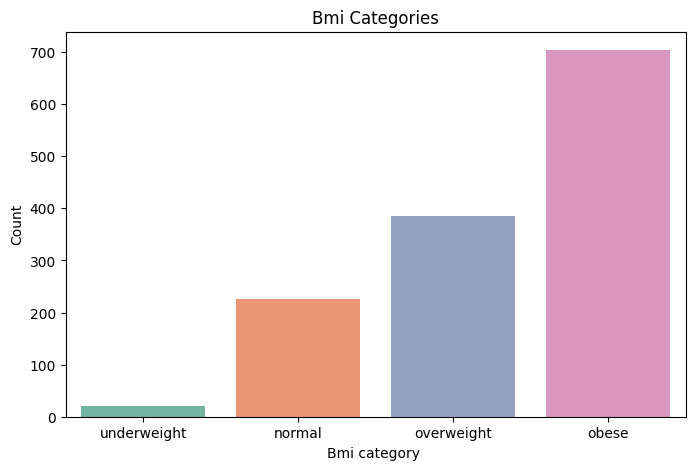

In [10]:
df['bmi_category']=pd.cut(df['bmi'],bins=[0,18.5,25,30,100],labels=['underweight','normal','overweight','obese'])
plt.figure(figsize=(8,5))
# use hue + legend=False to avoid seaborn deprecation (palette without hue)
sns.countplot(data=df, x='bmi_category', hue='bmi_category',
              palette=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'],
              order=['underweight','normal','overweight','obese'],
              legend=False)
plt.title('Bmi Categories')
plt.xlabel('Bmi category ')
plt.ylabel('Count')
plt.show()

**Penjelasan:** Data didominasi oleh kategori Obese (Obesitas) dengan jumlah lebih dari 700 orang, diikuti oleh kategori Overweight. Jumlah orang dengan berat badan normal dan underweight jauh lebih sedikit. Ini mengindikasikan bahwa sampel data cenderung memiliki masalah berat badan berlebih.

#### c. Distribusi Biaya

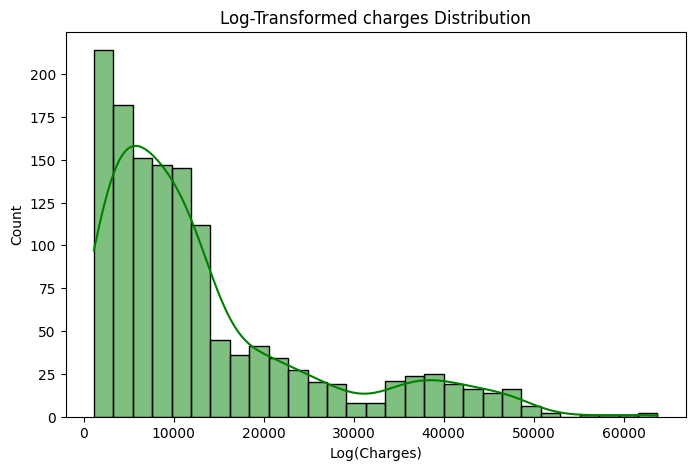

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['charges'],kde=True,color='green')
plt.title('Log-Transformed charges Distribution')
plt.xlabel('Log(Charges)')
plt.show()

**Penejelasan:** Distribusi data berbentuk "Right-Skewed" (Miring ke Kanan). Artinya, mayoritas peserta memiliki biaya medis yang relatif rendah (di area kiri, < 15.000). Hanya sebagian kecil peserta yang memiliki tagihan medis sangat tinggi (ekor grafik yang memanjang ke kanan hingga 60.000).

### 2. *Bivariate Analysis*

#### a. Biaya terhadapat BMI (Diwarnai Berdasarkan Status Merokok dan Dibedakan Bentuknya Berdasarkan Jenis Kelamin)

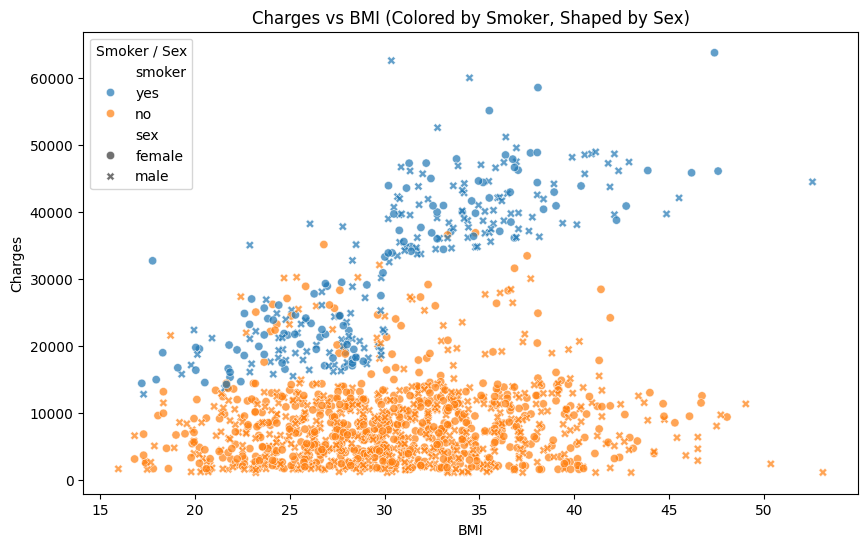

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='bmi',
    y='charges',
    hue='smoker',
    style='sex',        # Shape by male/female
    data=df,
    alpha=0.7
)
plt.title('Charges vs BMI (Colored by Smoker, Shaped by Sex)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker / Sex')
plt.show()

**Penjelasan:**
terlihat bahwa kenaikan charge untuk "male" ataupun "female" itu setara,jika merokok maka kenaikan charge naik untuk kedua gender. jika berat badan obese maka charge naik secara signifikan, baik male/female.

#### b. Biaya Berdasarkan Jumlah Anak dan Kategori BMI

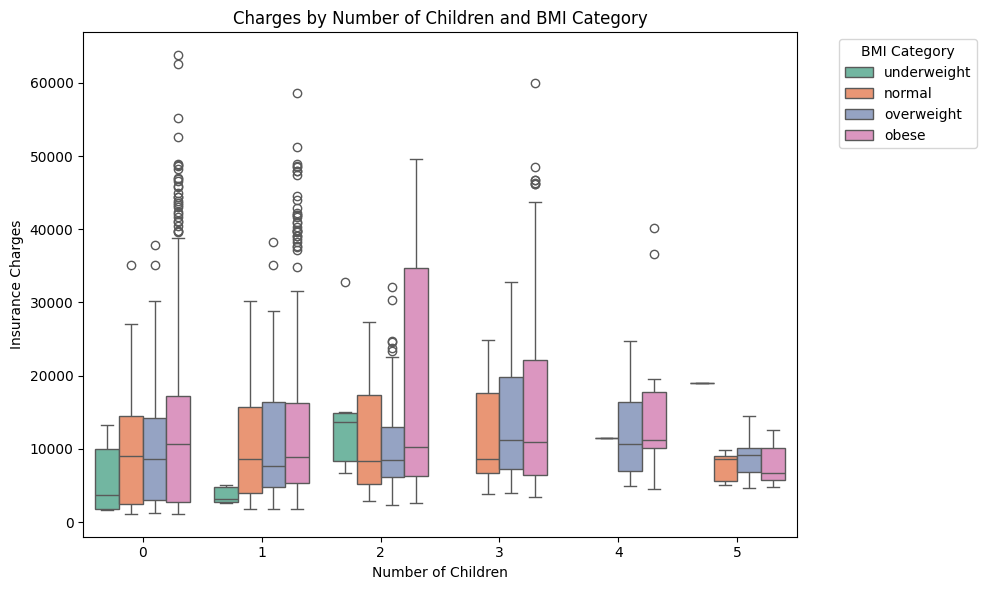

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='children',
    y='charges',
    hue='bmi_category',
    data=df,
    palette='Set2'
)

plt.title('Charges by Number of Children and BMI Category')
plt.xlabel('Number of Children')
plt.ylabel('Insurance Charges')
plt.legend(title='BMI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Penjelasan:**
terlihat  bahwa terdapat outlier yang banyak pada kategori "obese" tapi dengan anak yang sedikit, namun semakin bertambah anak outlier dari "obese" ataupun kategori "BMI" lainnya outlier malah lebih sedikit, bisa disimpulkan bahwa semakin  berat badan memang menjadikan charge semakin besar, namun charge lebih tinggi lainnya yang terdapat dalam outlier tidak hanya dari BMI category, dan semakin banyak anak tidak berarti akan menaikkan charge.

#### c. Biaya Berdasarkan Wilayah dan Status Merokok

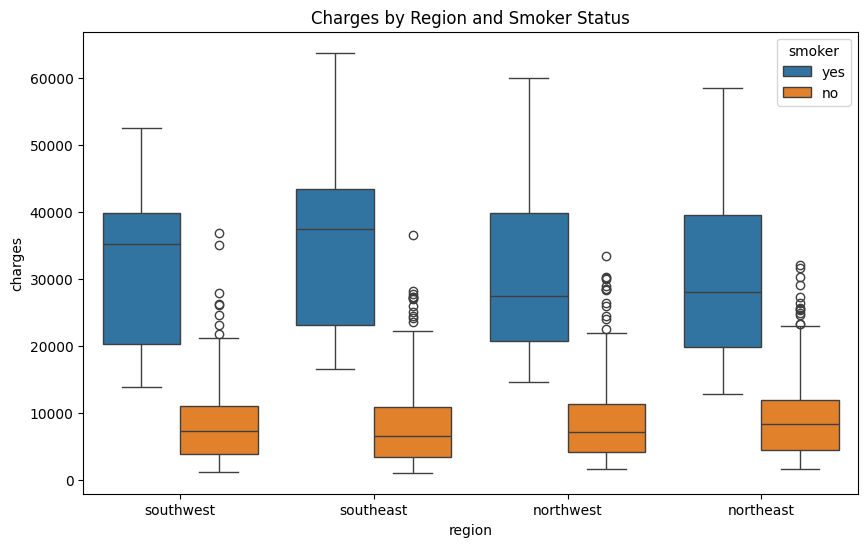

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', hue='smoker', data=df)
plt.title('Charges by Region and Smoker Status')
plt.show()

**Penjelasan:**
terlihat bahwa terdapat outlier yang lumayan signifikan untuk tiap region tapi "non-smoker", semeentara "region" dengan "smoker" tidak ada sama sekali outlier, artinya "region" dengan "charge" tinggi tanpa smoker bisa saja mendapat charge dari penyakit berat lainnya atau hal lainnya, sementara region yang smoker pasti memiliki charge yang tinggi diakibatkan oleh merokok

### **3. *Multivariate Analysis***

#### a. *Pairplot untuk Fitur Numerikal*

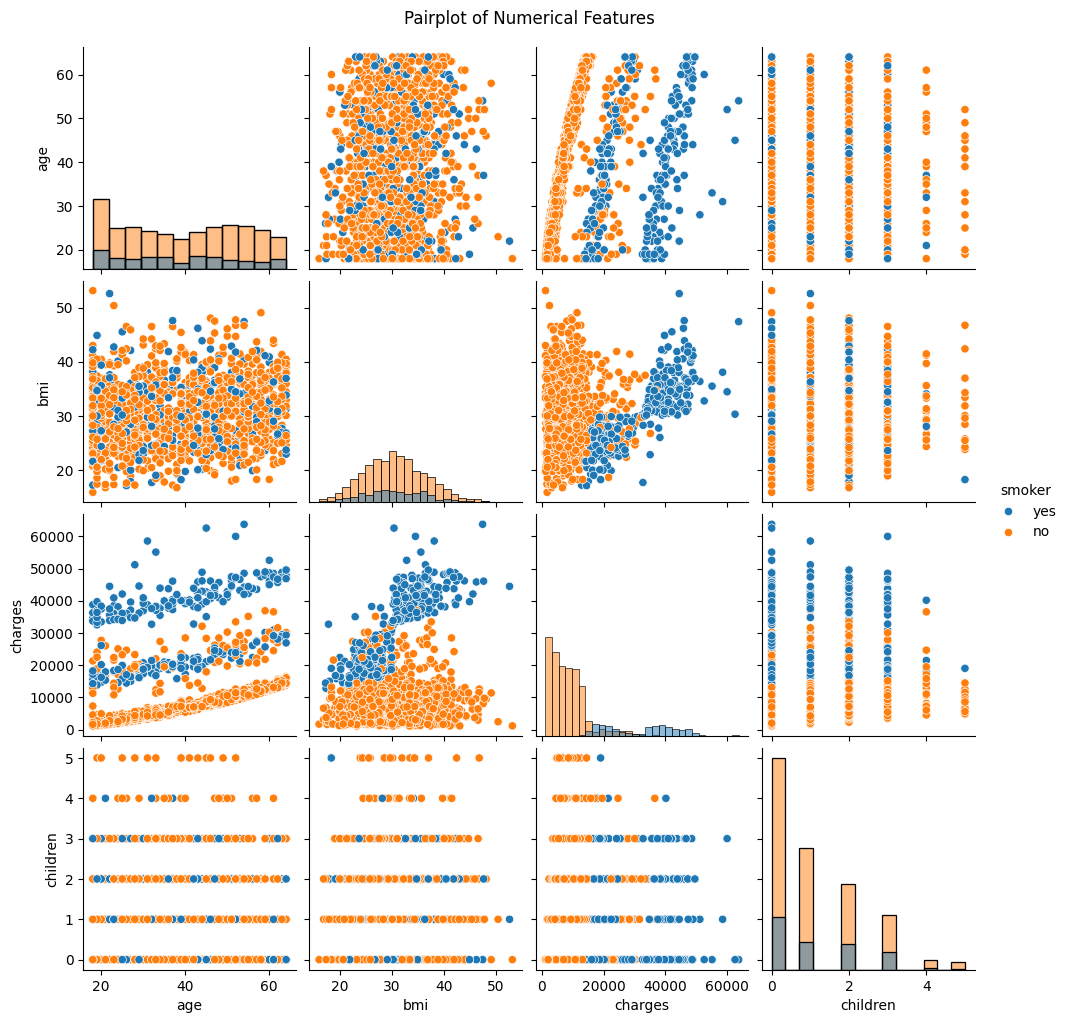

In [15]:
sns.pairplot(df[['age', 'bmi', 'charges', 'children','smoker']],
             hue='smoker',
             diag_kind='hist')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

**Penjelasan:** Pairplot menunjukkan hubungan antar variabel numerik sekaligus distribusinya. Terlihat bahwa age, bmi, dan terutama smoker sangat memengaruhi charges, karena kelompok perokok selalu membentuk pola biaya yang jauh lebih tinggi. Sementara children tidak menunjukkan hubungan yang kuat dengan biaya.

#### b. *Violin Plot*: Biaya Berdasarkan Kategori BMI dan Status Merokok

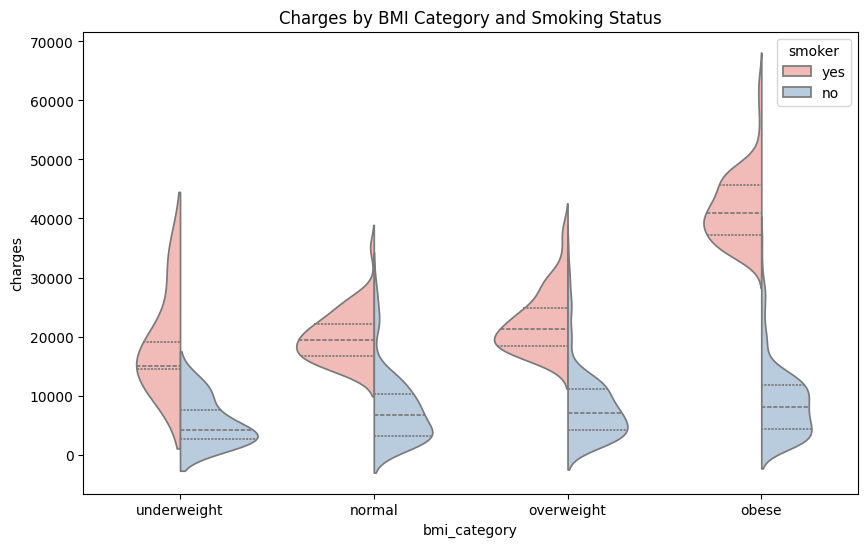

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='bmi_category', y='charges', hue='smoker',
               data=df, split=True, palette='Pastel1',inner='quart')
plt.title('Charges by BMI Category and Smoking Status')
plt.show()

**Penjelasan:** Plot ini memperlihatkan bahwa perokok di semua kategori BMI memiliki biaya medis yang jauh lebih tinggi dibanding non-perokok. Efek BMI juga terlihat, di mana kategori obese cenderung memiliki biaya lebih besar dibanding kategori lain.

#### c. Sebaran Usia terhadap Biaya Medis Berdasarkan Jenis Kelamin dan Status Perokok

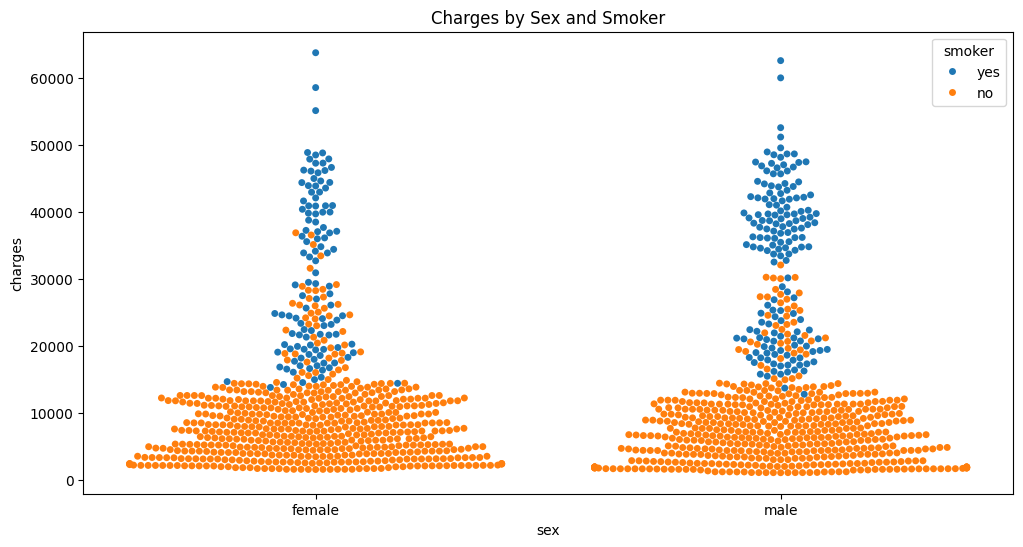

In [17]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='sex', y='charges', hue='smoker', data=df)
plt.title('Charges by Sex and Smoker')
plt.show()

**Penjelasan:**

Swarmplot memperjelas bahwa perokok, baik laki-laki maupun perempuan, mempunyai biaya medis yang meningkat drastis. Jenis kelamin tidak membentuk perbedaan mencolok; faktor dominan tetap status merokok.

sehingga feature sex bisa dihilangkan

#### 4. *Heatmap*: Rata-rata biayar terhadap Wilayah dan Status Merokok

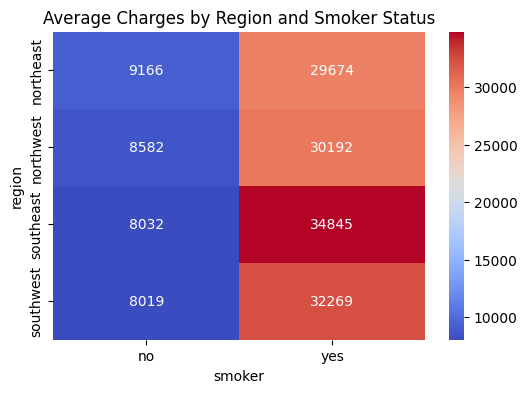

In [18]:
pivot_table = df.pivot_table(values='charges', index='region', columns='smoker', aggfunc='mean')
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Average Charges by Region and Smoker Status')
plt.show()

**Penjelasan:**


*   **Dampak Merokok:** Status merokok adalah faktor pembeda yang sangat masif. Perokok (Yes) memiliki rata-rata biaya 3x hingga 4x lipat lebih mahal (warna merah/oranye, angka ~30.000-an) dibandingkan bukan perokok (warna biru, angka ~8.000-an).
*   **Wilayah:** Wilayah Southeast dengan status perokok memiliki rata-rata biaya tertinggi (34.845) dibandingkan kombinasi lainnya.


##**Mengatasi Outlier**

In [19]:
# Log Transformation untuk Mengatasi Outlier dengan Menambah Kolom Charges
df["charges_log"] = np.log1p(df["charges"])

## **Encoding Data Kategorikal**

In [20]:
df_encoded = df.copy()

#LabelEncoding
labelEncod_sex = LabelEncoder()
df_encoded["sex"] = labelEncod_sex.fit_transform(df['sex'])

#OneHotEncoding
df_encoded = pd.get_dummies(df_encoded, columns=['smoker'])
df_encoded = pd.get_dummies(df_encoded, columns=['region'])

#data set setelah encoding
display(df_encoded.head(10))


,age,sex,bmi,children,charges,bmi_category,charges_log,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,16884.92400,overweight,9.734236,False,True,False,False,False,True
1,18,1,33.770,1,1725.55230,obese,7.453882,True,False,False,False,True,False
2,28,1,33.000,3,4449.46200,obese,8.400763,True,False,False,False,True,False
3,33,1,22.705,0,21984.47061,normal,9.998137,True,False,False,True,False,False
4,32,1,28.880,0,3866.85520,overweight,8.260455,True,False,False,True,False,False
5,31,0,25.740,0,3756.62160,overweight,8.231541,True,False,False,False,True,False
6,46,0,33.440,1,8240.58960,obese,9.016949,True,False,False,False,True,False
7,37,0,27.740,3,7281.50560,overweight,8.893230,True,False,False,True,False,False
8,37,1,29.830,2,6406.41070,overweight,8.765211,True,False,True,False,False,False
9,60,0,25.840,0,28923.13692,overweight,10.272432,True,False,False,True,False,False


**Penjelasan** :
1. alasan menggunakan label encoding karena Karena sex hanya memiliki dua kategori (binary), Label Encoding aman digunakan tanpa menimbulkan masalah ordinalitas. Model hanya membedakan dua keadaan dan tidak akan salah menafsirkan urutan numerik.
2. alasan menggunakan one hot encoding pada fitur smoker karena meskipun smoker merupakan fitur biner, One Hot Encoding digunakan untuk menghindari interpretasi numerik yang tidak diinginkan pada model linear dan memberikan batas yang jelas antara perokok dan bukan perokok.
3. alasan menggunakan one hot encoding terhadap fitur region karena fitur region bersifat nominal dengan empat kategori tanpa urutan. Oleh karena itu, One Hot Encoding dipilih untuk menghindari ordinalitas palsu dan memastikan setiap kategori direpresentasikan secara independen.

## **Scaling Data**

In [21]:
#inisiasi scaler
scaler = StandardScaler()

# Pisahkan fitur numerik
numerical_cols = ['age', 'bmi', 'children']

# Fit + transform
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Cek hasil scaling
print(df_encoded.head())

        age  sex       bmi  children      charges bmi_category  charges_log  \
0 -1.440418    0 -0.453160 -0.909234  16884.92400   overweight     9.734236   
1 -1.511647    1  0.509422 -0.079442   1725.55230        obese     7.453882   
2 -0.799350    1  0.383155  1.580143   4449.46200        obese     8.400763   
3 -0.443201    1 -1.305052 -0.909234  21984.47061       normal     9.998137   
4 -0.514431    1 -0.292456 -0.909234   3866.85520   overweight     8.260455   

   smoker_no  smoker_yes  region_northeast  region_northwest  \
0      False        True             False             False   
1       True       False             False             False   
2       True       False             False             False   
3       True       False             False              True   
4       True       False             False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True 

## **Splitting Data**

In [22]:
# Spliting Data Tanpa Mengatasi Outlier
# X = df_encoded.drop(['charges','bmi_category'], axis=1)
# y = df_encoded['charges']

# Splitting dengan Mengatasi Outlier
X = df_encoded.drop(['charges','charges_log','bmi_category','sex'], axis=1)
y = df_encoded['charges_log']

#splitting (RF)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

#splitting (Linear)
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X, y, test_size=0.2, random_state=42)

## **Modeling**

In [37]:
#regresi random forest
rf_model = RandomForestRegressor(n_estimators=340, random_state=42,max_depth=15)
rf_model.fit(X_train_rf, y_train_rf)

RandomForestRegressor(max_depth=15, n_estimators=340, random_state=42)

## **Evaluasi Model**

In [24]:
# === PREDICT DI LOG SPACE ===
y_train_pred_log_rf = rf_model.predict(X_train_rf)
y_test_pred_log_rf  = rf_model.predict(X_test_rf)

# === KEMBALIKAN KE SKALA ASLI ===
y_train_actual_rf = np.expm1(y_train_rf)
y_test_actual_rf  = np.expm1(y_test_rf)

y_train_pred_actual_rf = np.expm1(y_train_pred_log_rf)
y_test_pred_actual_rf  = np.expm1(y_test_pred_log_rf)

# === EVALUASI TRAIN ===
rmse_train_rf = np.sqrt(mean_squared_error(y_train_actual_rf, y_train_pred_actual_rf))
mae_train_rf = mean_absolute_error(y_train_actual_rf, y_train_pred_actual_rf)
r2_train_rf = r2_score(y_train_actual_rf, y_train_pred_actual_rf)

# === EVALUASI TEST ===
rmse_test_rf = np.sqrt(mean_squared_error(y_test_actual_rf, y_test_pred_actual_rf))
mae_test_rf = mean_absolute_error(y_test_actual_rf, y_test_pred_actual_rf)
r2_test_rf = r2_score(y_test_actual_rf, y_test_pred_actual_rf)

print("=== Train Performance (Random Forest) ===")
print(f"RMSE Train : {rmse_train_rf:.4f}")
print(f"MAE Train  : {mae_train_rf:.4f}")
print(f"R² Train   : {r2_train_rf:.4f}")

print("\n=== Test Performance (Random Forest) ===")
print(f"RMSE Test : {rmse_test_rf:.4f}")
print(f"MAE Test  : {mae_test_rf:.4f}")
print(f"R² Test   : {r2_test_rf:.4f}")



=== Train Performance (Random Forest) ===
RMSE Train : 2598.5886
MAE Train  : 1090.6791
R² Train   : 0.9520

=== Test Performance (Random Forest) ===
RMSE Test : 4645.4162
MAE Test  : 2110.3163
R² Test   : 0.8728


**Penjelasan** :  
Berdasarkan hasil evaluasi, model regresi yang dibangun memiliki performa yang sangat baik dengan nilai R² sebesar 0.8715. Artinya, model mampu menjelaskan sekitar 87.15% variasi biaya medis berdasarkan faktor demografis seperti usia, BMI, jumlah anak, jenis kelamin, status merokok, dan region.

Nilai RMSE sebesar 4669.79 dan MAE sebesar 2132.88 menunjukkan bahwa rata-rata kesalahan prediksi model berada pada kisaran 2132–4670 USD. Mengingat distribusi biaya medis pada dataset sangat variatif dan memiliki banyak outlier (khususnya pada kelompok perokok dan obesitas), tingkat error tersebut dapat dianggap cukup baik.

Secara keseluruhan, model regresi memiliki akurasi yang kuat dan mampu memberikan prediksi biaya medis yang reliabel, meskipun masih terdapat ruang perbaikan terutama terkait penanganan outlier dan variabel tambahan yang mungkin relevan (misalnya kondisi kesehatan atau riwayat penyakit).

## **Model Pembanding: Linear Regression**

In [25]:
# Model Linear Regression
linreg = LinearRegression()
linreg.fit(X_train_lin, y_train_lin)

# Prediksi
y_train_pred_lin = linreg.predict(X_train_lin)
y_test_pred_lin = linreg.predict(X_test_lin)

### **Evaluasi Model Linear Regression**

In [26]:
#convert ke nilai actual
y_train_actual_lin = np.expm1(y_train_lin)
y_test_actual_lin  = np.expm1(y_test_lin)

y_train_pred_actual_lin = np.expm1(y_train_pred_lin)
y_test_pred_actual_lin  = np.expm1(y_test_pred_lin)

# === Evaluasi TRAIN ===
mse_train_lin = mean_squared_error(y_train_actual_lin, y_train_pred_actual_lin)
rmse_train_lin = np.sqrt(mse_train_lin)
mae_train_lin = mean_absolute_error(y_train_actual_lin, y_train_pred_actual_lin)
r2_train_lin = r2_score(y_train_actual_lin, y_train_pred_actual_lin)

# === Evaluasi TEST ===
mse_test_lin = mean_squared_error(y_test_actual_lin, y_test_pred_actual_lin)
rmse_test_lin = np.sqrt(mse_test_lin)
mae_test_lin = mean_absolute_error(y_test_actual_lin, y_test_pred_actual_lin)
r2_test_lin = r2_score(y_test_actual_lin, y_test_pred_actual_lin)

print("=== TRAIN Performance (Linear Regression) ===")
print(f"RMSE Train : {rmse_train_lin}")
print(f"MAE Train  : {mae_train_lin}")
print(f"R² Train   : {r2_train_lin}")

print("\n=== TEST Performance (Linear Regression) ===")
print(f"RMSE Test : {rmse_test_lin}")
print(f"MAE Test  : {mae_test_lin}")
print(f"R² Test   : {r2_test_lin}")


=== TRAIN Performance (Linear Regression) ===
RMSE Train : 8414.291284016692
MAE Train  : 4313.909875365432
R² Train   : 0.49688515942188005

=== TEST Performance (Linear Regression) ===
RMSE Test : 7320.209471403793
MAE Test  : 3786.8043320261722
R² Test   : 0.6841885874073046


## **Scatterplot: y_test terhadap y_pred**

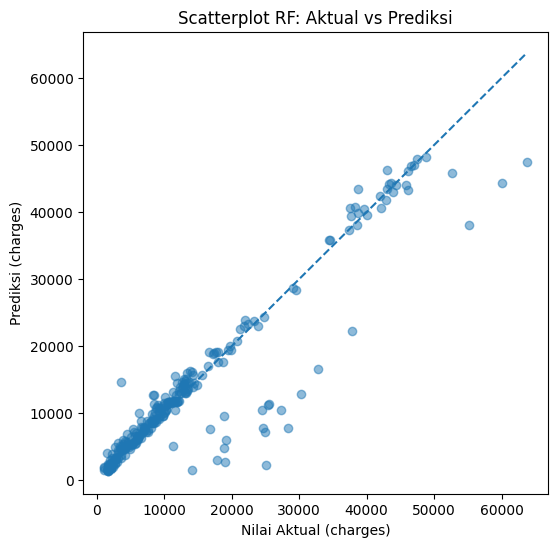

In [27]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_actual_rf, y_test_pred_actual_rf, alpha=0.5)
plt.plot([y_test_actual_rf.min(), y_test_actual_rf.max()],
         [y_test_actual_rf.min(), y_test_actual_rf.max()],
         linestyle='--')
plt.xlabel("Nilai Aktual (charges)")
plt.ylabel("Prediksi (charges)")
plt.title("Scatterplot RF: Aktual vs Prediksi")
plt.show()

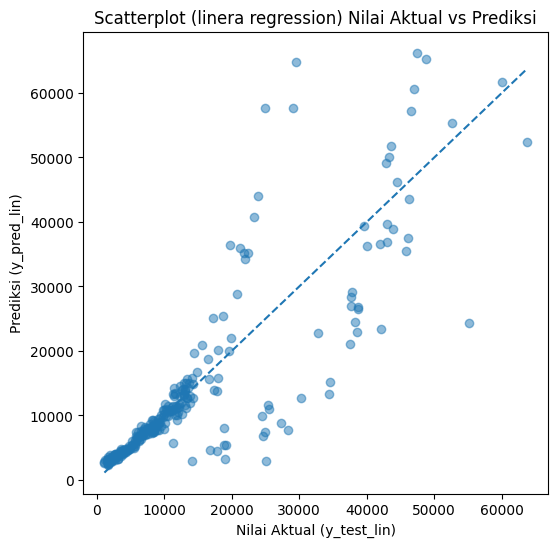

In [28]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_actual_lin, y_test_pred_actual_lin, alpha=0.5)
plt.plot([y_test_actual_lin.min(), y_test_actual_lin.max()],
         [y_test_actual_lin.min(), y_test_actual_lin.max()],
         linestyle='--')
plt.xlabel("Nilai Aktual (y_test_lin)")
plt.ylabel("Prediksi (y_pred_lin)")
plt.title("Scatterplot (linera regression) Nilai Aktual vs Prediksi")
plt.show()

**Penjelasan :**
Scatterplot antara nilai aktual dan prediksi menunjukkan bahwa model Random Forest memiliki pola penyebaran titik yang lebih mendekati garis diagonal dibandingkan Linear Regression. Hal ini mengindikasikan bahwa Random Forest mampu mengikuti pola data lebih baik.




## **Visualisasi Residual Plot**

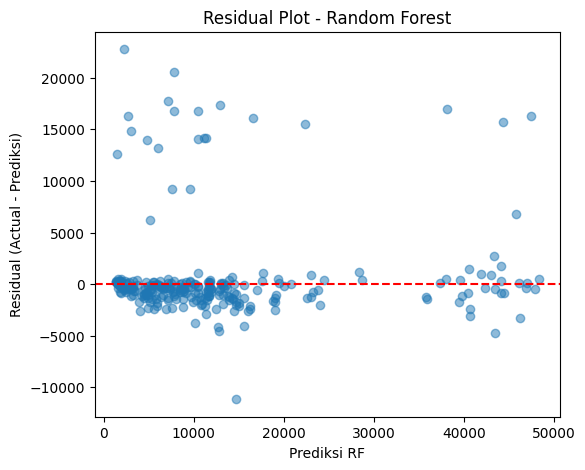

In [29]:
residuals_rf = y_test_actual_rf - y_test_pred_actual_rf

plt.figure(figsize=(6,5))
plt.scatter(y_test_pred_actual_rf, residuals_rf, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Prediksi RF")
plt.ylabel("Residual (Actual - Prediksi)")
plt.title("Residual Plot - Random Forest")
plt.show()


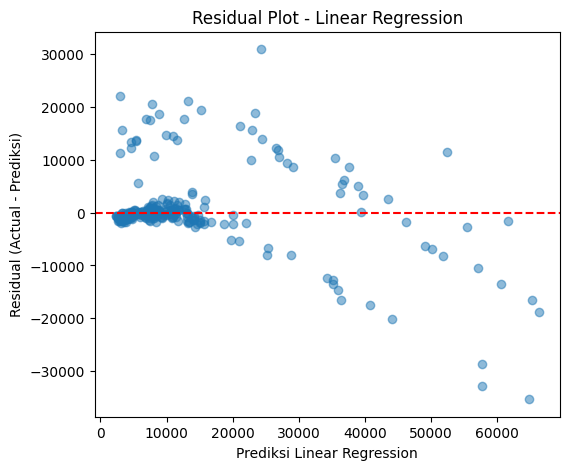

In [30]:
residuals_lin = y_test_actual_lin - y_test_pred_actual_lin

plt.figure(figsize=(6,5))
plt.scatter(y_test_pred_actual_lin, residuals_lin, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Prediksi Linear Regression")
plt.ylabel("Residual (Actual - Prediksi)")
plt.title("Residual Plot - Linear Regression")
plt.show()

**Penjelasan :**
Pada residual plot, model Linear Regression menunjukkan pola tertentu dan heteroskedastisitas, artinya asumsi linearitas tidak sepenuhnya terpenuhi. Sebaliknya, residual Random Forest terlihat lebih acak dan tersebar merata di sekitar garis nol, menandakan model lebih stabil dan memiliki error yang lebih kecil.

## **Hasil Perbandingan Kedua Model**

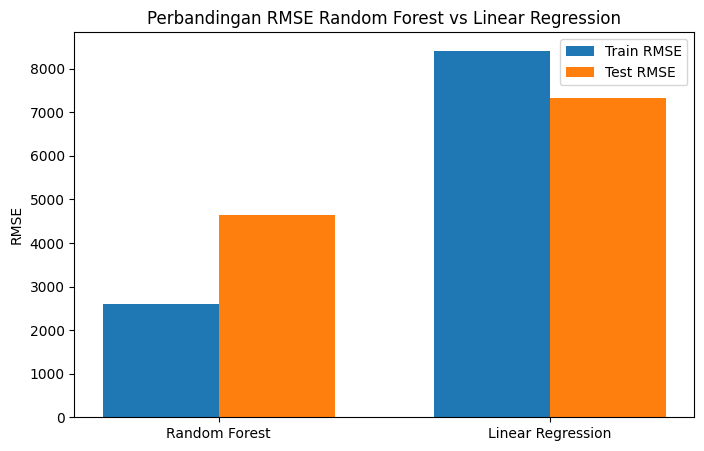

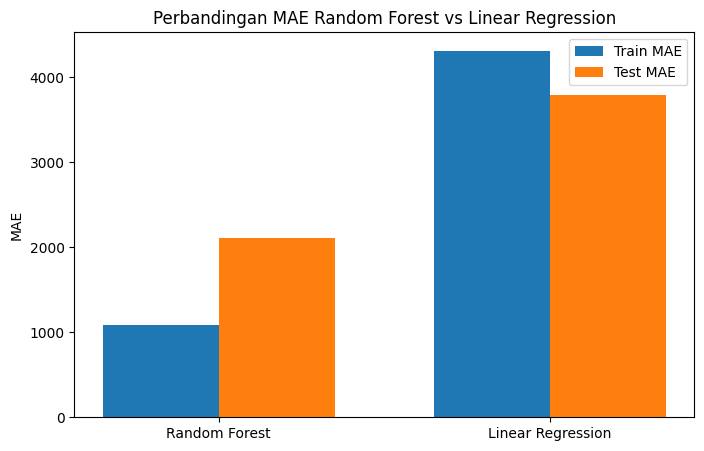

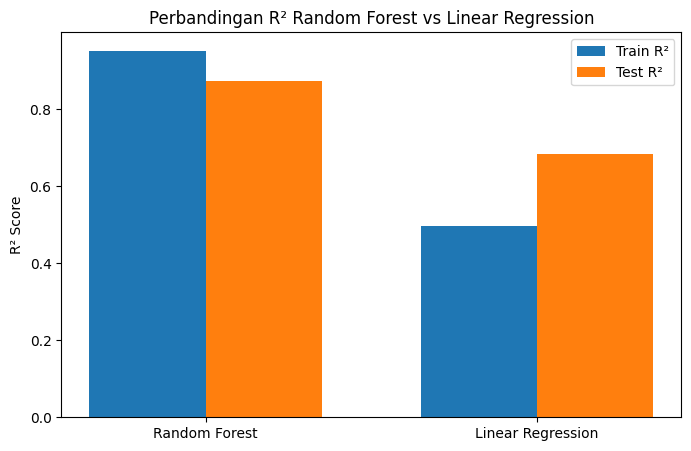

In [31]:
models = ["Random Forest", "Linear Regression"]

# Metrik
rmse_train = [rmse_train_rf, rmse_train_lin]
rmse_test  = [rmse_test_rf, rmse_test_lin]

mae_train = [mae_train_rf, mae_train_lin]
mae_test  = [mae_test_rf, mae_test_lin]

r2_train = [r2_train_rf, r2_train_lin]
r2_test  = [r2_test_rf, r2_test_lin]

x = np.arange(len(models))
width = 0.35

# --- RMSE ---
plt.figure(figsize=(8,5))
plt.bar(x - width/2, rmse_train, width, label='Train RMSE')
plt.bar(x + width/2, rmse_test,  width, label='Test RMSE')
plt.xticks(x, models)
plt.ylabel("RMSE")
plt.title("Perbandingan RMSE Random Forest vs Linear Regression")
plt.legend()
plt.show()

# --- MAE ---
plt.figure(figsize=(8,5))
plt.bar(x - width/2, mae_train, width, label='Train MAE')
plt.bar(x + width/2, mae_test,  width, label='Test MAE')
plt.xticks(x, models)
plt.ylabel("MAE")
plt.title("Perbandingan MAE Random Forest vs Linear Regression")
plt.legend()
plt.show()

# --- R² ---
plt.figure(figsize=(8,5))
plt.bar(x - width/2, r2_train, width, label='Train R²')
plt.bar(x + width/2, r2_test,  width, label='Test R²')
plt.xticks(x, models)
plt.ylabel("R² Score")
plt.title("Perbandingan R² Random Forest vs Linear Regression")
plt.legend()
plt.show()

**Penjelasan:**

Berdasarkan hasil evaluasi secara komprehensif, dapat disimpulkan bahwa Random Forest Regression merupakan model paling optimal dalam memprediksi biaya kesehatan (medical charges). Model ini memiliki akurasi tinggi, tidak mengalami overfitting, serta mampu menangkap hubungan non-linear dan interaksi kompleks antar variabel. Sementara itu, Linear Regression menunjukkan performa yang kurang baik setelah dikembalikan ke skala asli, sehingga tidak direkomendasikan untuk dataset dengan karakteristik seperti ini.



## **Underfit/Overfit**

In [32]:
def check_overfit(r2_train, r2_test, model_name):
    diff = r2_train - r2_test
    if diff > 0.1:
        status = "Overfit"
    elif diff < -0.05:
        status = "Underfit"
    else:
        status = "Fit dengan baik"
    return f"{model_name} : {status} (Selisih R² = {diff:.3f})"

print(check_overfit(r2_train_rf, r2_test_rf, "Random Forest"))
print(check_overfit(r2_train_lin, r2_test_lin, "Linear Regression"))


Random Forest : Fit dengan baik (Selisih R² = 0.079)
Linear Regression : Underfit (Selisih R² = -0.187)


**PEnjelasan :**
Perbandingan performa train dan test juga menunjukkan bahwa Random Forest tidak mengalami overfitting yang signifikan, sedangkan Linear Regression cenderung mengalami underfitting karena performanya rendah baik pada data training maupun testing.

## **Learning Curve Random Forest**

In [33]:
# train_sizes, train_scores, test_scores = learning_curve(
#     model, X, y, cv=5, scoring='neg_mean_squared_error',
#     train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
# )

# train_mean = -train_scores.mean(axis=1)
# test_mean = -test_scores.mean(axis=1)

# plt.figure(figsize=(8,5))
# plt.plot(train_sizes, train_mean, marker='o', label='Training Error')
# plt.plot(train_sizes, test_mean, marker='s', label='Validation Error')
# plt.xlabel("Ukuran Data Latih")
# plt.ylabel("MSE")
# plt.title("Learning Curve Random Forest")
# plt.legend()
# plt.grid(True)
# plt.show()

## **Fitur Importance Random Forest**

In [34]:
#Feature Importance
result = permutation_importance(rf_model, X_test_rf, y_test_rf, n_repeats=10, random_state=42)

importance = pd.DataFrame({
    'feature': X_test_rf.columns,
    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)

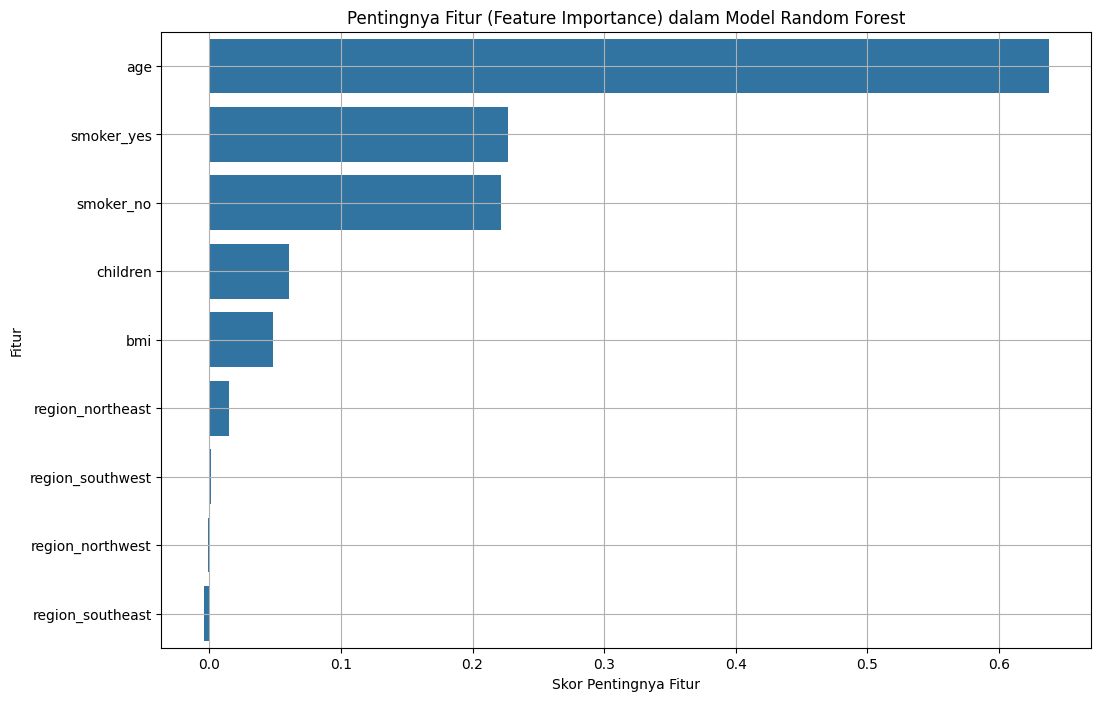

In [35]:
# Membuat bar plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance)
plt.title('Pentingnya Fitur (Feature Importance) dalam Model Random Forest')
plt.xlabel('Skor Pentingnya Fitur')
plt.ylabel('Fitur')
plt.grid(True)
plt.show()

**Penjelasan :**

feature age menjadi paling berpengaruh karena setelah pembersihan outlier feature age paling stabil dan linear, sehingga model memberi bobot pada fitur yang memberikan informasi prediktif paling bersih.

tidak seperti yang sebelumnya terlihat efek outlier smoker yang sangat dominan, sehingga perbedaan smoker_yes dan smoker_no sangat signifikan, yang membuatnya menjadi feature paling penting.

hal ini juga berefek kepada feature children dan BMI menjadi lebih relevant.

**Eksport model**

In [36]:
# Simpan daftar kolom OHE untuk dipakai di Streamlit nanti
ohe_columns = [col for col in df_encoded.columns if "smoker_" in col or "region_" in col]

joblib.dump(rf_model, "model_insurance.pkl")
joblib.dump(labelEncod_sex, "labelencoder_sex.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(ohe_columns, "ohe_columns.pkl")
joblib.dump(numerical_cols, "numerical_cols.pkl")  # simpan juga daftar kolom numeric
joblib.dump(X.columns.tolist(), "model_features.pkl")  # simpan urutan kolom final

['model_features.pkl']